2. Use iris flower dataset from sklearn library and use cross_val_score against following models to
measure the performance of each. In the end figure out the model with best performance,
▪ Logistic Regression
▪ SVM
▪ Decision Tree
▪ Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [ ]:
models = [logistic_regression, svm, decision_tree, random_forest]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

In [ ]:
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    print(f"{name}: Mean Accuracy = {mean_score:.4f}")

Logistic Regression: Mean Accuracy = 0.9733
SVM: Mean Accuracy = 0.9667
Decision Tree: Mean Accuracy = 0.9533
Random Forest: Mean Accuracy = 0.9600


In [ ]:
best_model_index = np.argmax([cross_val_score(model, X, y, cv=5).mean() for model in models])
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]
print(f"The model with the best performance is {best_model_name}.")

The model with the best performance is Logistic Regression.


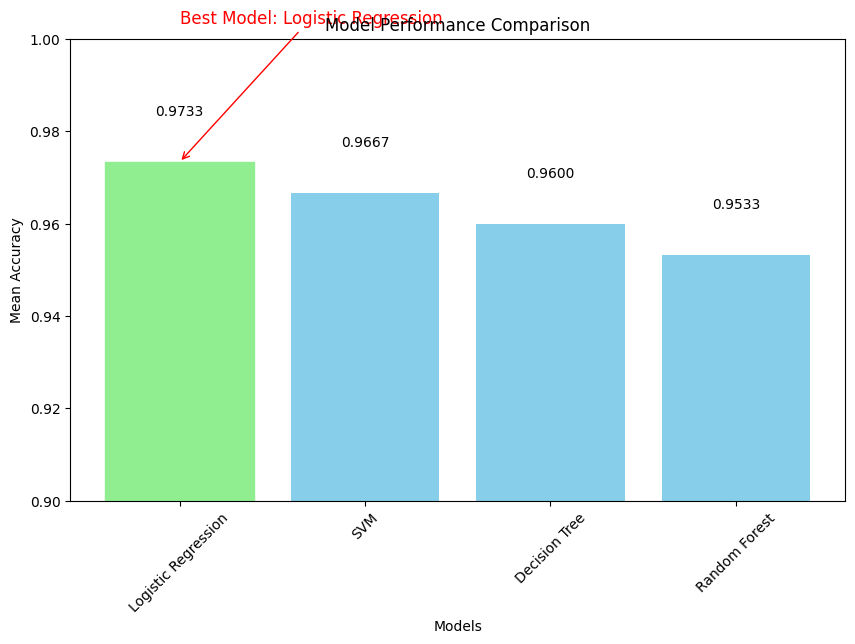

In [ ]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
mean_accuracy_scores = [0.9733, 0.9667, 0.9600, 0.9533]
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mean_accuracy_scores, color='skyblue')
best_model_index = mean_accuracy_scores.index(max(mean_accuracy_scores))
best_model = model_names[best_model_index]
bars[best_model_index].set_color('lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0.9, 1.0])
plt.xticks(rotation=45)
for i, score in enumerate(mean_accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center')
plt.annotate(f'Best Model: {best_model}', xy=(best_model_index, mean_accuracy_scores[best_model_index]),
             xytext=(best_model_index, mean_accuracy_scores[best_model_index] + 0.03),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')
plt.show()